# Telkomsel Data Science Academy Pretest Case Exam
- - -
#### Prepared by: Wahyu Sejati Roso
#### NIK : 90048
#### Jakarta, 16 October 2019

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

In [110]:
data = pd.read_csv('https://www.openml.org/data/get_csv/4965302/churn.arff')

In [73]:
data.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [74]:
data.isnull().any()

state                            False
account_length                   False
area_code                        False
phone_number                     False
international_plan               False
voice_mail_plan                  False
number_vmail_messages            False
total_day_minutes                False
total_day_calls                  False
total_day_charge                 False
total_eve_minutes                False
total_eve_calls                  False
total_eve_charge                 False
total_night_minutes              False
total_night_calls                False
total_night_charge               False
total_intl_minutes               False
total_intl_calls                 False
total_intl_charge                False
number_customer_service_calls    False
class                            False
dtype: bool

In [75]:
data.describe()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,100.25860,436.911400,2499.500000,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,...,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400
std,14.80348,39.69456,42.209182,1443.520003,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,...,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469
min,0.00000,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.00000,73.00000,408.000000,1249.750000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.00000,100.00000,415.000000,2499.500000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,...,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.00000,127.00000,415.000000,3749.250000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,...,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,50.00000,243.00000,510.000000,4999.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,...,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


# Exploration Question
- - -

### 1. Dari 5000 customer, berapa banyak customer yg churn & yang stay?
- - -

In [76]:
stay,churn = data['class'].value_counts()
print('Sebanyak '+str(stay)+' customer stay sedangkan sebanyak '+str(churn)+' customer churn')

Sebanyak 4293 customer stay sedangkan sebanyak 707 customer churn


### 2. Secara umum bagaimana perbedaan profil customer yg churn dengan yg tidak?
- - -

In [80]:
normalized_data = data.loc[:, data.columns != 'class']
# normalized_data = data[top5_var]
normalized_data = (normalized_data - normalized_data.mean()) / (normalized_data.max() - data.min())
normalized_data['class'] = data['class']
# churn = normalized_data[normalized_data['class']==1]
# stay = normalized_data[normalized_data['class']==0]

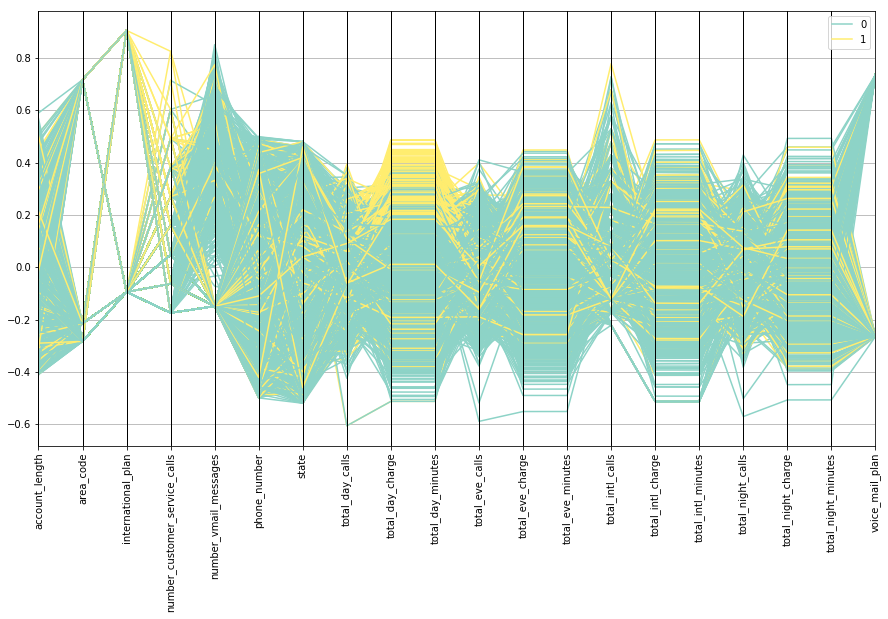

In [91]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
parallel_coordinates(normalized_data,'class', colormap=plt.get_cmap("Set3"))
plt.show()

Dari visualisasi di atas, terdapat perbedaan yg mencolok antara customer yg churn dengan yang tidak pada beberapa variable. Antara lain:<br>
1. Number of customer service calls (variable ini mengindikasikan bahwa customer yg churn kemungkinan besar sering melakukan complain sebelum akhirnya churn).<br>
2. International plan & international call (ada kemungkinan bahwa customer yang churn merupakan fraudster yang melakukan panggilan roaming ke negara-negara hotlist country atau customer tersebut churn akibat bill shock dari tagihan roaming yang membengkak).<br>
3. Total days charge & day minutes (pelanggan yang churn memiliki total days charge & total day minutes yang lebih tinggi dibandingkan dengan yang stay. Salah satu kemungkinan churnnya bisa diakibatkan oleh bill shock dari pemakaian yang tinggi tersebut)

### 3 Variable apa saja yg memiliki korelasi yang tertinggi dengan target variable?

In [77]:
np.abs(data.corr(method= 'kendall')['class']).sort_values(ascending=False)[1:6]

international_plan               0.259123
total_day_minutes                0.138156
total_day_charge                 0.138156
number_customer_service_calls    0.130292
voice_mail_plan                  0.110698
Name: class, dtype: float64

Dengan menggunakan pearson correlation didapatkan 5 variable yang korelasi tertinggi dengan class (apakah customer tersebut churn atau tidak) yakni:<br>
1. international_plan<br>
2. total_day_minutes<br>
3. total_day_charge<br>
4. number_customer_service_calls<br>
5. voice_mail_plan.<br><br>
Variable2 di atas selaras dengan hasil explorasi data pada pertanyaan ke 2 dengan tambahan variable voice mail plan yang perlu ditelusuri lebih lanjut karena korelasi negatif menunjukkan customer dengan voice mail plan lebih resistan untuk churn.

In [78]:
top5_var = ['international_plan', 'total_day_minutes', 'total_day_charge','number_customer_service_calls','voice_mail_plan']
var = top5_var + ['class']
data[var].corr(method= 'kendall')['class']

international_plan               0.259123
total_day_minutes                0.138156
total_day_charge                 0.138156
number_customer_service_calls    0.130292
voice_mail_plan                 -0.110698
class                            1.000000
Name: class, dtype: float64

### 4. Dari customer yang churn berapa banyak yang memiliki voice mail plan, dan berapa banyak yang tidak?

In [102]:
churn = data[data['class']==1]
dont_have_vm, have_vm =  churn['voice_mail_plan'].value_counts()
print('Dari '+str(dont_have_vm+have_vm)+' customer yang churn, sebanyak '+str(dont_have_vm)+' tidak memiliki \
voice mail plan dan sisanya sebanyak '+str(have_vm)+' memiliki voice mail plan.\
Dengan asumsi bahwa pelanggan yang berlangganan voice mail adalah \
customer corporate / professional maka cukup reasonable bahwa voice mail plan memliki korelasi negatif dengan tingkat churn customer.')

Dari 707 customer yang churn, sebanyak 605 tidak memiliki voice mail plan dan sisanya sebanyak 102 memiliki voice mail plan.Dengan asumsi bahwa pelanggan yang berlangganan voice mail adalah customer corporate / professional maka cukup reasonable bahwa voice mail plan memliki korelasi negatif dengan tingkat churn customer.


### 5. Dari customer yang memiliki international plan berapa mean international charge dari customer yang churn & yang tidak?

In [129]:
churn = data[data['class']==1]
stay = data[data['class']==1]
mean_churn = churn['total_intl_charge'].mean()
mean_stay = stay['total_intl_charge'].mean()
print('Rata-rata tagihan intl roaming untuk customer yg churn adalah '+str(mean_churn)+' sedangkan customer yang tidak sebesar '+str(mean_stay))

Rata-rata tagihan intl roaming untuk customer yg churn adalah 2.8874257425742584 sedangkan customer yang tidak sebesar 2.8874257425742584
